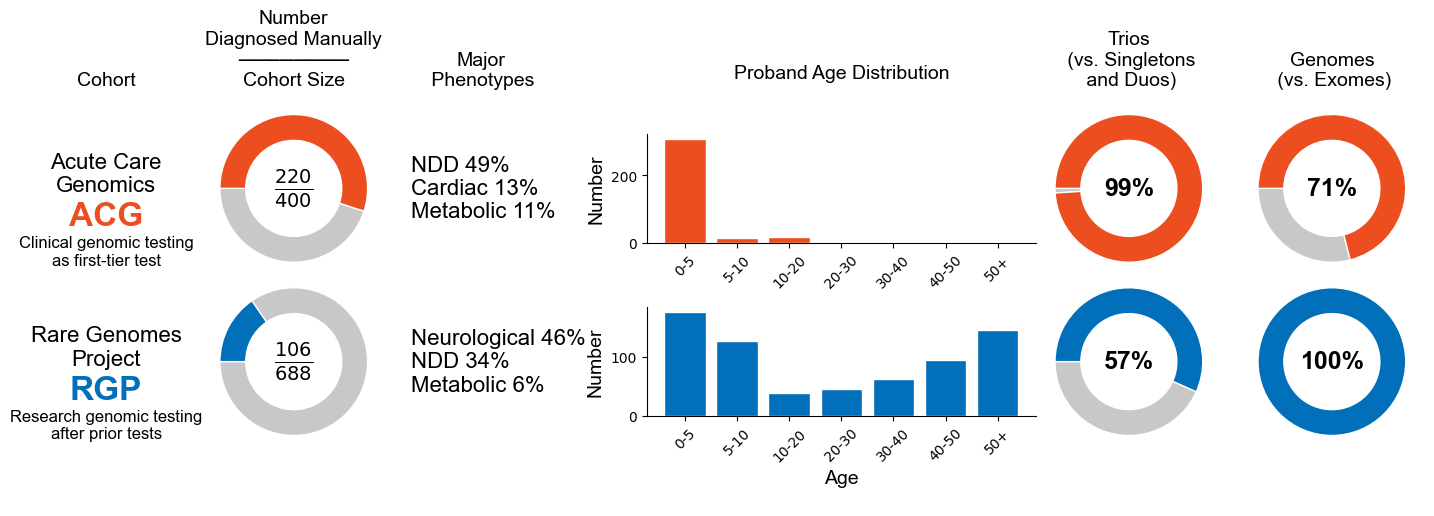

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle


data = pd.read_csv('../../Data/Fig2/Fig2_panel1.csv', header=0, index_col=0)
RGP_age_data = pd.read_csv('../../Data/Fig2/RGP_Data_For_Talos_Paper_public.csv', header=0, index_col=0)
ACG_age_data = pd.read_csv('../../Data/Fig2/ACG_ages.csv', header=0, index_col=0)

# Manual Solves ACG
x1 = int(data['Total_solves'][0])
t1 = int(data['Cohort_size'][0])
y1 = t1-x1
sizes1 = [y1, x1]
text1 = r'$\frac{{{}}}{{{}}}$'.format(x1, t1)
labels1 = ['', '']
col1 = ['#C8C8C8', '#EC4E20']

# Manual Solves RGP
x1_2 = int(data['Total_solves'][1])
t1_2 = int(data['Cohort_size'][1])
y1_2 = t1_2-x1_2
sizes1_2 = [y1_2, x1_2]
text1_2 = r'$\frac{{{}}}{{{}}}$'.format(x1_2, t1_2)
labels1_2 = ['', '']
col1_2 = ['#C8C8C8', '#016FB9']

# Trios vs. Singletons ACG
x5 = int(data['Trios'][0])
t5 = int(data['Cohort_size'][0])
y5 = t5-x5
sizes5 = [y5, x5]
text5 = "{:.0%}".format(x5 / t5)
labels5 = ['', '']
col5 = ['#C8C8C8', '#EC4E20']

# Trios vs. Singletons RGP
x5_2 = int(data['Trios'][1])
t5_2 = int(data['Cohort_size'][1])
y5_2 = t5_2-x5_2
sizes5_2 = [y5_2, x5_2]
text5_2 = "{:.0%}".format(x5_2 / t5_2)
labels5_2 = ['', '']
col5_2 = ['#C8C8C8', '#016FB9']

# Genomes vs. Exomes ACG
x6 = int(data['Genomes'][0])
t6 = int(data['Cohort_size'][0])
y6 = t6-x6
sizes6 = [y6, x6]
text6 = "{:.0%}".format(x6 / t6)
labels6 = ['', '']
col6 = ['#C8C8C8', '#EC4E20']

# Genomes vs. Exomes RGP
x6_2 = int(data['Genomes'][1])
t6_2 = int(data['Cohort_size'][1])
y6_2 = t6_2-x6_2
sizes6_2 = [y6_2, x6_2]
text6_2 = "{:.0%}".format(x6_2 / t6_2)
labels6_2 = ['', '']
col6_2 = ['#C8C8C8', '#016FB9']

# Major Phenotypes data
Ap3 = int(data['Phen1_num'][0])
Bp3 = int(data['Phen2_num'][0])
Cp3 = int(data['Phen3_num'][0])
Totalp3 = int(data['Cohort_size'][0])

Ap3_2 = int(data['Phen1_num'][1])
Bp3_2 = int(data['Phen2_num'][1])
Cp3_2 = int(data['Phen3_num'][1])
Totalp3_2 = int(data['Cohort_size'][1])

# Novel Solves data
countp2 = 7
Total = 200

# Age data
ACG_ages = ACG_age_data['Number']
bin_labels = ["0-5", "5-10", "10-20", "20-30", "30-40", "40-50", "50+"] # custom labels for the bins
#age_categories = pd.cut(ages, bins=bin_edges, right=False)

# Age data RGP
RGP_ages = RGP_age_data['Age_buckets']
bin_labels_2 = ["0-5", "5-10", "10-20", "20-30", "30-40", "40-50", "50+"]

# Create figure and gridspec layout
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(2, 7, width_ratios=[1, 1.2, 0, 0.75, 3, 1.2, 1.2], wspace=0.1, hspace=-0.4)
#gs = gridspec.GridSpec(2, 7, width_ratios=[1, 1.5, 0.75, 0.75, 3, 1.2, 1.2], wspace=0.5, hspace=-0.4) #include panel 3


# First row
# New first panel: Text only
ax0 = fig.add_subplot(gs[0, 0])
ax0.axis('off')  # Turn off the axis
ax0.text(0.5, 0.55, 'Acute Care\nGenomics', ha='center', va='center', fontsize=16, fontname='Arial')
ax0.text(0.5, 0.40, 'ACG', ha='center', va='center', fontsize=24, fontname='Arial', fontweight='bold', color='#EC4E20')
ax0.text(0.5, 0.28, 'Clinical genomic testing\nas first-tier test', ha='center', va='center', fontsize=12, fontname='Arial')


# Second panel: Known Solves
ax1 = fig.add_subplot(gs[0, 1])
ax1.axis('equal')
width = 0.35
kwargs = dict(colors=col1, startangle=180)
outside, _ = ax1.pie(sizes1, radius=1, pctdistance=1 - width / 2, labels=labels1, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=20, fontweight='bold', va='center', fontname='Arial')
ax1.text(0, 0, text1, ha='center', **kwargs)

# Fourth panel: Major Phenotypes
ax3 = fig.add_subplot(gs[0, 3])
ax3.axis('off')  # Turn off the axis
phen1 = data['Major_Phen1'][0]
phen2 = data['Major_Phen2'][0]
phen3 = data['Major_Phen3'][0]
text3 = f'{phen1} {Ap3/Totalp3:.0%}\n{phen2} {Bp3/Totalp3:.0%}\n{phen3} {Cp3/Totalp3:.0%}'
ax3.text(-0.1, 0.5, text3, ha='left', va='center', fontsize=16, fontname='Arial')

# Fifth panel: Histogram
ax4 = fig.add_subplot(gs[0, 4])
#age_counts = age_categories.value_counts().sort_index()
ax4.bar(bin_labels, ACG_ages, edgecolor='white', color=col5[1])
#ax4.set_xlabel('Age', fontsize=14, fontname='Arial') # Relying on identical label in row below
ax4.set_ylabel('Number', fontsize=14, fontname='Arial')
ax4.set_xticks(range(len(bin_labels)))
ax4.set_xticklabels(bin_labels, rotation=45)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# Adjust the bounding box of the histogram
pos = ax4.get_position()
pos_new = [pos.x0 + 0.05, pos.y0 + 0.15, pos.width - 0.04, pos.height - 0.3]
ax4.set_position(pos_new)

# Sixth panel: Pie chart
ax5 = fig.add_subplot(gs[0, 5])
ax5.axis('equal')
width = 0.35
kwargs = dict(colors=col5, startangle=180)
outside, _ = ax5.pie(sizes5, radius=1, pctdistance=1 - width / 2, labels=labels5, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=18, fontweight='bold', va='center', fontname='Arial')
ax5.text(0, 0, text5, ha='center', **kwargs)

# Seventh panel: Pie chart
ax6 = fig.add_subplot(gs[0, 6])
ax6.axis('equal')
width = 0.35
kwargs = dict(colors=col6, startangle=180)
outside, _ = ax6.pie(sizes6, radius=1, pctdistance=1 - width / 2, labels=labels6, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=18, fontweight='bold', va='center', fontname='Arial')
ax6.text(0, 0, text6, ha='center', **kwargs)


# Second row (duplicate of the first row)
# New first panel: Text only
ax0_2 = fig.add_subplot(gs[1, 0])
ax0_2.axis('off')  # Turn off the axis
ax0_2.text(0.5, 0.55, 'Rare Genomes\nProject', ha='center', va='center', fontsize=16, fontname='Arial')
ax0_2.text(0.5, 0.40, 'RGP', ha='center', va='center', fontsize=24, fontname='Arial', fontweight='bold', color='#016FB9')
ax0_2.text(0.5, 0.28, 'Research genomic testing\nafter prior tests', ha='center', va='center', fontsize=12, fontname='Arial')


# Second panel: Known Solves
ax1_2 = fig.add_subplot(gs[1, 1])
ax1_2.axis('equal')
width = 0.35
kwargs = dict(colors=col1_2, startangle=180)
outside, _ = ax1_2.pie(sizes1_2, radius=1, pctdistance=1 - width / 2, labels=labels1, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=20, fontweight='bold', va='center', fontname='Arial')
ax1_2.text(0, 0, text1_2, ha='center', **kwargs)

# Fourth panel: Major Phenotypes
ax3_2 = fig.add_subplot(gs[1, 3])
ax3_2.axis('off')  # Turn off the axis
phen1 = data['Major_Phen1'][1]
phen2 = data['Major_Phen2'][1]
phen3 = data['Major_Phen3'][1]
text3_2 = f'{phen1} {Ap3_2/Totalp3_2:.0%}\n{phen2} {Bp3_2/Totalp3_2:.0%}\n{phen3} {Cp3_2/Totalp3_2:.0%}'
ax3_2.text(-0.1, 0.5, text3_2, ha='left', va='center', fontsize=16, fontname='Arial')

# Fifth panel: Histogram
ax4_2 = fig.add_subplot(gs[1, 4])
age_counts_2 = RGP_ages.value_counts().sort_index()
ax4_2.bar(bin_labels_2, age_counts_2.values, edgecolor='white', color=col5_2[1])
ax4_2.set_xlabel('Age', fontsize=14, fontname='Arial')
ax4_2.set_ylabel('Number', fontsize=14, fontname='Arial')
ax4_2.set_xticks(range(len(bin_labels_2)))
ax4_2.set_xticklabels(bin_labels_2, rotation=45)
ax4_2.spines['top'].set_visible(False)
ax4_2.spines['right'].set_visible(False)

# Adjust the bounding box of the histogram
pos = ax4_2.get_position()
pos_new = [pos.x0 + 0.05, pos.y0 + 0.15, pos.width - 0.04, pos.height - 0.3]
ax4_2.set_position(pos_new)

# Sixth panel: Pie chart
ax5_2 = fig.add_subplot(gs[1, 5])
ax5_2.axis('equal')
width = 0.35
kwargs = dict(colors=col5_2, startangle=180)
outside, _ = ax5_2.pie(sizes5_2, radius=1, pctdistance=1 - width / 2, labels=labels5_2, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=18, fontweight='bold', va='center', fontname='Arial')
ax5_2.text(0, 0, text5_2, ha='center', **kwargs)

# Seventh panel: Pie chart
ax6_2 = fig.add_subplot(gs[1, 6])
ax6_2.axis('equal')
width = 0.35
kwargs = dict(colors=col6_2, startangle=180)
outside, _ = ax6_2.pie(sizes6_2, radius=1, pctdistance=1 - width / 2, labels=labels6_2, **kwargs)
plt.setp(outside, width=width, edgecolor='white')
kwargs = dict(size=18, fontweight='bold', va='center', fontname='Arial')
ax6_2.text(0, 0, text6_2, ha='center', **kwargs)

# Add titles
# Why do these have this strange "y" value? See this github issue for more info:
# https://github.com/matplotlib/matplotlib/issues/16805#issuecomment-600277360
# Hopefully at some point an update will fix this

ax0.set_title('Cohort', fontsize=14, fontname='Arial', pad=-30, y=1.000001)
ax1.set_title('Number\nDiagnosed Manually\n────────\nCohort Size', fontsize=14, fontname='Arial', pad=-30, y=1.000001)
#ax2.set_title('Novel Solves\n Found with Talos', fontsize=14, fontname='Arial', pad=81)
ax3.set_title('Major\n Phenotypes', fontsize=14, fontname='Arial', pad=-30, y=1.000001)
ax4.set_title('Proband Age Distribution', fontsize=14, fontname='Arial', pad=40)  # Adjust the pad value to move the title higher
ax5.set_title('Trios\n (vs. Singletons\n and Duos)', fontsize=14, fontname='Arial', pad=-30, y=1.000001)
ax6.set_title('Genomes\n (vs. Exomes)', fontsize=14, fontname='Arial', pad=-30, y=1.000001)


fig.savefig('../../Figures/Fig2/Fig2_panel1.png')